In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('scores.csv')
X = df[['Hours']].values
y = df['Scores'].values

In [3]:
df.head()

,Hours,Scores
0,4.37,28.14
1,9.56,69.49
2,7.59,53.61
3,6.60,50.73
4,2.40,16.97


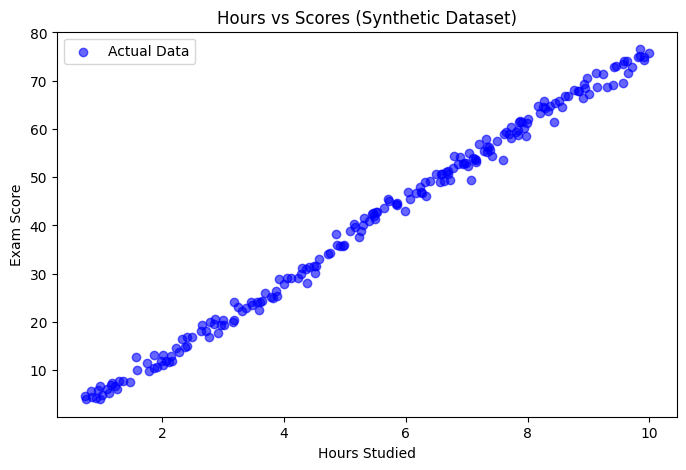

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours vs Scores (Synthetic Dataset)')
plt.legend()
plt.show()

In [5]:
#degree 2
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
model2 = LinearRegression()
model2.fit(X_poly2, y)
y_pred2 = model2.predict(X_poly2)

In [6]:
#degree 3
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
model3 = LinearRegression()
model3.fit(X_poly3, y)
y_pred3 = model3.predict(X_poly3)

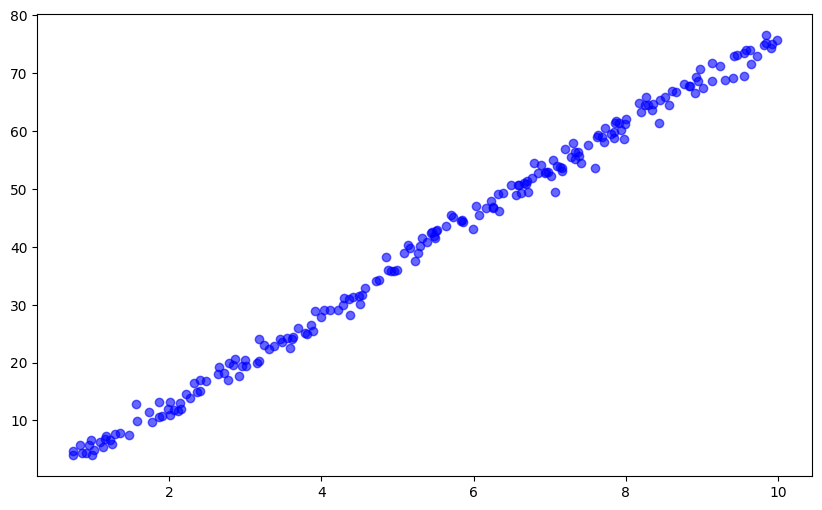

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')

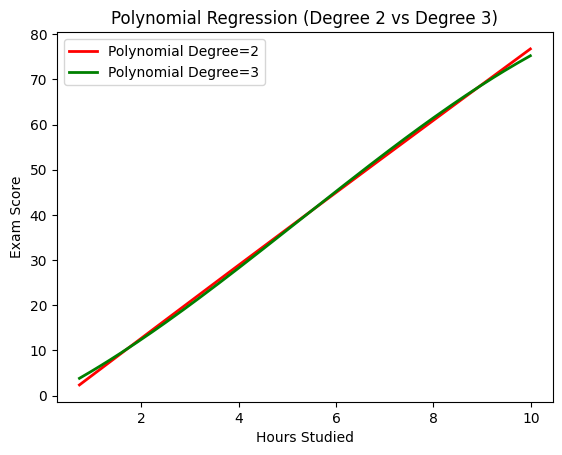

In [8]:
sort_idx = np.argsort(X.flatten())
X_sorted = X[sort_idx]
plt.plot(X_sorted, model2.predict(poly2.transform(X_sorted)), color='red', label='Polynomial Degree=2', linewidth=2)
plt.plot(X_sorted, model3.predict(poly3.transform(X_sorted)), color='green', label='Polynomial Degree=3', linewidth=2)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression (Degree 2 vs Degree 3)')
plt.legend()
plt.show()

In [9]:
r2_deg2 = r2_score(y, y_pred2)
r2_deg3 = r2_score(y, y_pred3)
print(f"Degree 2 R² Score : {r2_deg2:.4f}")
print(f"Degree 3 R² Score : {r2_deg3:.4f}")

Degree 2 R² Score : 0.9954
Degree 3 R² Score : 0.9962


In [12]:
#Predict score for 7.5 hours
hours = np.array([[7.5]])
pred_deg2 = model2.predict(poly2.transform(hours))[0]
pred_deg3 = model3.predict(poly3.transform(hours))[0]
print(f"\nPredicted Score (Degree=2) for 7.5 hours: {pred_deg2:.2f}")
print(f"Predicted Score (Degree=3) for 7.5 hours: {pred_deg3:.2f}")


Predicted Score (Degree=2) for 7.5 hours: 56.97
Predicted Score (Degree=3) for 7.5 hours: 57.59


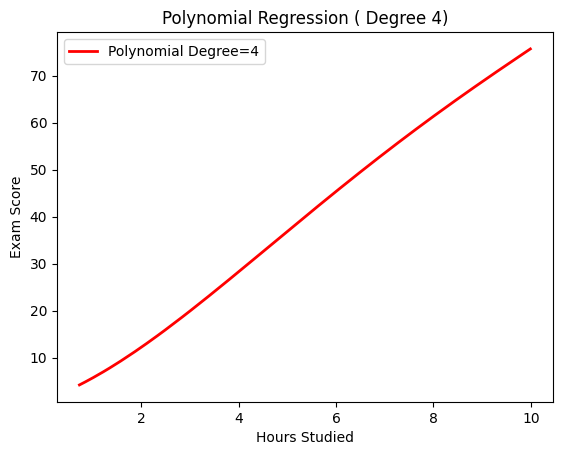


Predicted Score (Degree=4) for 7.5 hours: 57.50


In [17]:
# Degree 4 Polynomial Regression
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)

model4 = LinearRegression()
model4.fit(X_poly4, y)  # Fix: Use X_poly4 here, not X_poly3
y_pred4 = model4.predict(X_poly4)

# Plot degree 4 regression curve
plt.plot(X_sorted, model4.predict(poly4.transform(X_sorted)), color='red', label='Polynomial Degree=4', linewidth=2)

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression ( Degree 4)')
plt.legend()
plt.show()

pred_deg4 = model4.predict(poly4.transform(hours))[0]
print(f"\nPredicted Score (Degree=4) for 7.5 hours: {pred_deg4:.2f}")